<a href="https://colab.research.google.com/github/HanmingMeng/Coursera_Capstone/blob/main/IBM_Data_Science_Capstone_Project_Hanming_Meng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Living in San Francisco**
## Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera
### Created by Hanming Meng

This notebook will be mainly used for the capstone project and will be updated along the course.

In [1]:
!pip install Numpy
import pandas as pd
import numpy as np

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Table of contents
* [Introduction: Objectives](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Objectives <a name="introduction"></a>

In this project we will try to find the pattern of neighborhoods in **San Francisco, CA** where I am will be living for the next year. 

This report group the neighborhoods into several clusters based on their venues which enables new-comers, such as me and my friends, to make plan for weekends and social gatherings.



## Data <a name="data"></a>

Based on definition of our Objective, we will need:
* The zipcode data of San Francisco obtaied from web scarpping
* Location data of each neighborhoods obtained via uszipcode package
* Venue data obtained from Foursqare API


## Methodology <a name="methodology"></a>

We will use the **explore** function to get the most common venue categories in each neighborhood, and then use _k_-means clustering algorithm to group the neighborhoods into clusters.

When determining the k value, we will use the elbow method to evaluate the best k.

## Analysis <a name="analysis"></a>

#### Let's first scrape the **zipcode** data of San Francisco and save them in a pandas dataframe.

In [2]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

response = requests.get("http://www.healthysf.org/bdi/outcomes/zipmap.htm")
soup = BeautifulSoup(response.text, "lxml")
table = soup.find_all("table")
df = pd.read_html(str(table))
df = pd.DataFrame(df[4])

df.columns = df.iloc[0]
df = df.iloc[1:-1, :-1]
sf_data = df
sf_data.head()

,Zip Code,Neighborhood
1,94102,Hayes Valley/Tenderloin/North of Market
2,94103,South of Market
3,94107,Potrero Hill
4,94108,Chinatown
5,94109,Polk/Russian Hill (Nob Hill)


#### Using **uszipcode** package to convert zipcode information into coordinates for mapping.

In [3]:
!pip install uszipcode
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)

latitude = []
longitude = []

for index, row in df.iterrows():
    zipcode = search.by_zipcode(row["Zip Code"]).to_dict()
    latitude.append(zipcode.get("lat"))
    longitude.append(zipcode.get("lng"))

sf_data["Latitude"] = latitude
sf_data["Longitude"] = longitude

sf_data.head()

,Zip Code,Neighborhood,Latitude,Longitude
1,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420
2,94103,South of Market,37.780,-122.410
3,94107,Potrero Hill,37.770,-122.390
4,94108,Chinatown,37.791,-122.409
5,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420


In [4]:
from geopy.geocoders import Nominatim

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

In [36]:
address = 'San Francisco'

geolocator = Nominatim(user_agent="san_francisco_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.419906.


In [5]:
map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(sf_data['Latitude'], sf_data['Longitude'], sf_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 

map

#### Based on this initial visualisation, we have spotted an **outliner**, **Outer Richmond**, which we should alter its lat, long data manually. 

In [6]:
sf_data.loc[sf_data['Neighborhood'] == 'Outer Richmond', 'Latitude']=37.779
sf_data.loc[sf_data['Neighborhood'] == 'Outer Richmond', 'Longitude']=-122.490
sf_data

,Zip Code,Neighborhood,Latitude,Longitude
1,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420
2,94103,South of Market,37.780,-122.410
3,94107,Potrero Hill,37.770,-122.390
4,94108,Chinatown,37.791,-122.409
5,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420
6,94110,Inner Mission/Bernal Heights,37.750,-122.420
7,94112,Ingelside-Excelsior/Crocker-Amazon,37.720,-122.440
8,94114,Castro/Noe Valley,37.760,-122.440
9,94115,Western Addition/Japantown,37.790,-122.440
10,94116,Parkside/Forest Hill,37.740,-122.480


#### And zoom in a bit to get a larger view of the city SF

In [7]:
address = 'San Francisco'

geolocator = Nominatim(user_agent="san_francisco_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, neighborhood in zip(sf_data['Latitude'], sf_data['Longitude'], sf_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 

map

### Objective 1. Cluster San Francisco Neighborhoods

#### Now let's explore San Francisco neighborhoods using the Foursquare API

#### Firstly, we define functions to get the Venues nearby each neighborhoods.

In [8]:
##Info omitted for privacy
CLIENT_ID = 'your-client-ID' #Foursquare ID Info omitted for privacy
CLIENT_SECRET = 'your-client-secret' #Foursquare Secret Info omitted for privacy
ACCESS_TOKEN = 'your-access-token' #FourSquare Access Token Info omitted for privacy
VERSION = '20180605'  
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your-client-ID
CLIENT_SECRET:your-client-secret


In [9]:
CLIENT_ID = 'DALK5NTQRFRWJ3DG2DO5ZMR0NQRQ5QKVQS3XZXGZQOMAJOFS' 
CLIENT_SECRET = 'ULM414Y30QWYKQB2YQHPGRE1WL15JGMY3WB1O25GP5HCVJQ2' # your Foursquare 
ACCESS_TOKEN = 'HTHPMZKSEW2WNDITADT0RYJ4FSFBEGN4REB2Z4TCHRIPAFUF' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DALK5NTQRFRWJ3DG2DO5ZMR0NQRQ5QKVQS3XZXGZQOMAJOFS
CLIENT_SECRET:ULM414Y30QWYKQB2YQHPGRE1WL15JGMY3WB1O25GP5HCVJQ2


In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
sf_venues = getNearbyVenues(names=sf_data['Neighborhood'],
                                   latitudes=sf_data['Latitude'],
                                   longitudes=sf_data['Longitude']
                                  )

Hayes Valley/Tenderloin/North of Market
South of Market
Potrero Hill
Chinatown
Polk/Russian Hill (Nob Hill)
Inner Mission/Bernal Heights
Ingelside-Excelsior/Crocker-Amazon
Castro/Noe Valley
Western Addition/Japantown
Parkside/Forest Hill
Haight-Ashbury
Inner Richmond
Outer Richmond
Sunset
Marina
Bayview-Hunters Point
St. Francis Wood/Miraloma/West Portal
Twin Peaks-Glen Park
Lake Merced
North Beach/Chinatown
Visitacion Valley/Sunnydale


#### Take a glance of the venues around each neighborhoods. And count the total number of unique venue types within 500 meters of each San Francisco neighborhoods.

In [13]:
print(sf_venues.shape)
sf_venues.head()

(914, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,War Memorial Opera House,37.778601,-122.420816,Opera House
1,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,Louise M. Davies Symphony Hall,37.777976,-122.420157,Concert Hall
2,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,Herbst Theater,37.779548,-122.420953,Concert Hall
3,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,San Francisco Ballet,37.778580,-122.420798,Dance Studio
4,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,"Books, Inc.",37.781614,-122.420531,Bookstore


In [14]:
sf_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview-Hunters Point,4,4,4,4,4,4
Castro/Noe Valley,56,56,56,56,56,56
Chinatown,89,89,89,89,89,89
Haight-Ashbury,27,27,27,27,27,27
Hayes Valley/Tenderloin/North of Market,79,79,79,79,79,79
Ingelside-Excelsior/Crocker-Amazon,38,38,38,38,38,38
Inner Mission/Bernal Heights,41,41,41,41,41,41
Inner Richmond,62,62,62,62,62,62
Lake Merced,16,16,16,16,16,16


In [15]:
print('There are {} uniques categories.'.format(len(sf_venues['Venue Category'].unique())))

There are 216 uniques categories.


#### Analyze each neighborhoods by turning venues types into dummy variables.

In [16]:
# one hot encoding
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

sf_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bed & Breakfast,Beer Bar,Bike Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,...,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
sf_onehot.shape

(914, 217)

In [18]:
sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bed & Breakfast,Beer Bar,Bike Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,...,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Bayview-Hunters Point,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Castro/Noe Valley,0.017857,0.017857,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,...,0.017857,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.017857,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.035714,0.017857,0.035714
2,Chinatown,0.000000,0.000000,0.000000,0.022472,0.000000,0.011236,0.000000,0.000000,0.000000,0.011236,0.000000,0.011236,0.022472,0.011236,0.000000,0.000000,0.011236,0.000000,0.000000,0.000000,0.067416,0.00000,0.000000,0.000000,0.022472,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,0.011236,0.011236,0.011236,0.033708,0.000000,0.011236,0.000000,0.022472,...,0.000000,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.033708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033708,0.000000,0.000000,0.022472,0.000000,0.000000,0.000000,0.000000,0.011236,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.022472,0.011236,0.000000,0.000000,0.011236
3,Haight-Ashbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.037037,0.00000,0.000000,0.000000,0.037037,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.00000

#### Let's put each neighborhood along with the top 10 most common venues into a new dataframe. 
First, let's write a function to sort the venues in descending order.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sf_grouped['Neighborhood']

for ind in np.arange(sf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview-Hunters Point,Motorcycle Shop,Coffee Shop,Health & Beauty Service,Liquor Store,Yoga Studio,Filipino Restaurant,French Restaurant,Fountain,Food Truck,Food & Drink Shop
1,Castro/Noe Valley,Park,Pharmacy,Gay Bar,Thai Restaurant,Coffee Shop,Yoga Studio,Playground,Wine Bar,Pizza Place,Pet Store
2,Chinatown,Boutique,Coffee Shop,Hotel,Spa,Sushi Restaurant,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Hotel Bar,Liquor Store
3,Haight-Ashbury,Grocery Store,Bakery,Coffee Shop,Mexican Restaurant,Boutique,Gastropub,Bubble Tea Shop,Spa,Burrito Place,Café
4,Hayes Valley/Tenderloin/North of Market,Vietnamese Restaurant,Coffee Shop,Sandwich Place,French Restaurant,Wine Bar,Cocktail Bar,Vegetarian / Vegan Restaurant,Beer Bar,Theater,Pizza Place


#### Now, let's cluster the neighborhoods.
#### To find out the optimum value for k, we use the elbow methods. We should select the value of k, after which the distortion/inertia start decreasing in a linear fashion.

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [22]:
sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

K = range(1, 10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(sf_grouped_clustering)
    kmeanModel.fit(sf_grouped_clustering)
 
    distortions.append(sum(np.min(cdist(sf_grouped_clustering, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / sf_grouped_clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(sf_grouped_clustering, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / sf_grouped_clustering.shape[0]
    mapping2[k] = kmeanModel.inertia_

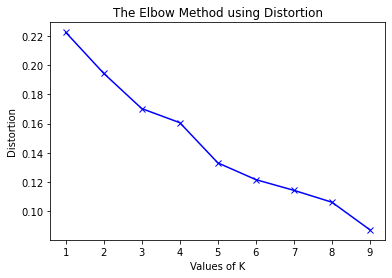

In [23]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

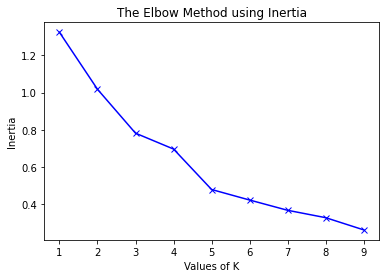

In [24]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### From the above graphs, especially using inertia method, we could tell that, for the given data, **the optimal number of clusters for the data is 4.**

#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

Run _k_-means to cluster the neighborhood into 5 clusters.

In [25]:
# set number of clusters
kclusters = 4

sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [29]:
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis = 1,inplace = True)
except KeyError:
    pass



In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sf_merged = sf_data

# merge sf_grouped with sf_data to add latitude/longitude for each neighborhood
sf_merged = sf_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sf_merged.head() # check the last columns!

,Zip Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420,3,Vietnamese Restaurant,Coffee Shop,Sandwich Place,French Restaurant,Wine Bar,Cocktail Bar,Vegetarian / Vegan Restaurant,Beer Bar,Theater,Pizza Place
2,94103,South of Market,37.780,-122.410,3,Coffee Shop,Sandwich Place,Theater,Bakery,Café,Mexican Restaurant,Vietnamese Restaurant,American Restaurant,Marijuana Dispensary,Pizza Place
3,94107,Potrero Hill,37.770,-122.390,3,Food Truck,Coffee Shop,Pharmacy,Harbor / Marina,Street Food Gathering,Pizza Place,Gym,Café,New American Restaurant,Mediterranean Restaurant
4,94108,Chinatown,37.791,-122.409,3,Boutique,Coffee Shop,Hotel,Spa,Sushi Restaurant,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Hotel Bar,Liquor Store
5,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420,3,Grocery Store,Massage Studio,Sushi Restaurant,Donut Shop,Diner,Thai Restaurant,Gym / Fitness Center,Mexican Restaurant,Wine Bar,Steakhouse


## Results and Discussion <a name="results"></a>

#### Finally, let's visualize the resulting clusters

In [31]:
address = 'San Francisco'

geolocator = Nominatim(user_agent="san_francisco_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_merged['Latitude'], sf_merged['Longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

#### Cluster 1: Away From the City


In [32]:
sf_merged.loc[sf_merged['Cluster Labels'] == 0, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,St. Francis Wood/Miraloma/West Portal,Bus Line,Fountain,Scenic Lookout,Park,Field,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Food


#### Cluster 2: Visit the Bay

In [33]:
sf_merged.loc[sf_merged['Cluster Labels'] == 1, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Bayview-Hunters Point,Motorcycle Shop,Coffee Shop,Health & Beauty Service,Liquor Store,Yoga Studio,Filipino Restaurant,French Restaurant,Fountain,Food Truck,Food & Drink Shop


#### Cluster 3: The Outdoor Choice

In [34]:
sf_merged.loc[sf_merged['Cluster Labels'] == 2, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Visitacion Valley/Sunnydale,Park,Baseball Field,Garden,Field,Fried Chicken Joint,French Restaurant,Fountain,Food Truck,Food & Drink Shop,Food


#### Cluster 4: A Typical Day at Frisco

In [35]:
sf_merged.loc[sf_merged['Cluster Labels'] == 3, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Hayes Valley/Tenderloin/North of Market,Vietnamese Restaurant,Coffee Shop,Sandwich Place,French Restaurant,Wine Bar,Cocktail Bar,Vegetarian / Vegan Restaurant,Beer Bar,Theater,Pizza Place
2,South of Market,Coffee Shop,Sandwich Place,Theater,Bakery,Café,Mexican Restaurant,Vietnamese Restaurant,American Restaurant,Marijuana Dispensary,Pizza Place
3,Potrero Hill,Food Truck,Coffee Shop,Pharmacy,Harbor / Marina,Street Food Gathering,Pizza Place,Gym,Café,New American Restaurant,Mediterranean Restaurant
4,Chinatown,Boutique,Coffee Shop,Hotel,Spa,Sushi Restaurant,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Hotel Bar,Liquor Store
5,Polk/Russian Hill (Nob Hill),Grocery Store,Massage Studio,Sushi Restaurant,Donut Shop,Diner,Thai Restaurant,Gym / Fitness Center,Mexican Restaurant,Wine Bar,Steakhouse
6,Inner Mission/Bernal Heights,Mexican Restaurant,Italian Restaurant,Grocery Store,Art Gallery,Deli / Bodega,Bakery,Yoga Studio,Dive Bar,Burrito Place,Café
7,Ingelside-Excelsior/Crocker-Amazon,Pizza Place,Chinese Restaurant,Bar,Bus Station,Café,Sandwich Place,Coffee Shop,Mexican Restaurant,Deli / Bodega,Restaurant
8,Castro/Noe Valley,Park,Pharmacy,Gay Bar,Thai Restaurant,Coffee Shop,Yoga Studio,Playground,Wine Bar,Pizza Place,Pet Store
9,Western Addition/Japantown,Park,Spa,Wine Bar,Bakery,Sushi Restaurant,Chinese Restaurant,Coffee Shop,Sports Bar,Hotel,Sandwich Place
10,Parkside/Forest Hill,Chinese Restaurant,Park,Café,Sandwich Place,Light Rail Station,Bakery,Pizza Place,Yoga Studio,Dance Studio,Snack Place


## Conclusion <a name="conclusion"></a>

#### Based on the above observation, we can discover that San Francisco is a small but vibrant city. 
* Neighborhoods within San Francisco are mostly homogenous, but each contain multicultural characteristics by themselves. This is indicated by the volumn and variety of diners, bars etc.

* Venues within each neighborhoods imply that people living in San Francisco lead a both vibrant and busy lifestyle, with coffee shops being the top 3 most common venues in almost every neighborhoods.

* People in San Francisco cares about physiques and health, since sports bars, Gyms and parks all around the city.